# Pymaceuticals Inc.
---

### Analysis

The experiment tested 10 drug regimens on mice. Two drugs were used to more frequently that others, Camomulin 230 results and Ramicane 228 results. The least tested drug was Propriva 148 results.  With the mean and median being similar the data is fairly symentrical and would be good to use to predict future results. 


The distrubution of male to female mice were almost a 50:50 split(51%:49% respectively). There were 249 mice test but 1 was removed from the analysis due to a duplicate result. 


With the evaluation of 4 drugs (Campomulin, Ramicane, Infubinol and Ceftamin) for outliers only 1 drug showed an outliner Infubinol.  This is another indication that the data would be well suited to predict further results.

With the evaluation of 1 mouse (m601) for the drug regimen of Capomulin, it indicates that with increased time the tumor volume in mm3 size decrease which is to be expected.  While there is a small increase in tumor volume between 35 and 40 days further evaluation would be required to determine if this was an anomaly for this mouse or typically for treatments.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge( mouse_metadata, study_results, on=["Mouse ID"], how="outer")
# Display the data table for preview
combined_data.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1265,o302,Placebo,Female,2,29,20,56.177611,0
1397,q132,Infubinol,Female,1,30,30,54.656549,4
1681,w193,Infubinol,Male,22,30,10,48.346550,0
1261,o302,Placebo,Female,2,29,0,45.000000,0
553,a788,Zoniferol,Male,5,30,10,50.159721,1
316,j246,Capomulin,Female,21,21,30,38.044082,1
657,c282,Placebo,Male,12,27,45,65.815165,2
1062,k603,Propriva,Male,2,27,15,48.775286,0
1409,q511,Zoniferol,Female,2,28,10,50.311647,0
123,y793,Capomulin,Male,17,17,40,31.475411,2


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_data = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicated_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data["Mouse ID"] != "g989"]
cleaned_data.sample(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
893,g558,Propriva,Male,8,29,40,61.774963,4
1520,s565,Stelasyn,Female,3,29,5,48.242552,0
1426,q633,Zoniferol,Male,12,25,5,47.183802,0
546,a699,Propriva,Female,5,28,25,51.846381,0
214,a520,Ramicane,Male,13,21,45,38.810366,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = cleaned_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = cleaned_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_var = cleaned_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = cleaned_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_errors = cleaned_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


 



# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({"Tumor Mean" : tumor_mean,"Tumor Median" : tumor_median," Tumor Variance" : tumor_var,
                       "Tumor STD Deviation" : tumor_std," Tumor SEM" 
                        : tumor_errors})
print(tumor_df)

              Tumor Mean  Tumor Median   Tumor Variance  Tumor STD Deviation  \
Drug Regimen                                                                   
Capomulin      40.675741     41.557809        24.947764             4.994774   
Ceftamin       52.591172     51.776157        39.290177             6.268188   
Infubinol      52.884795     51.820584        43.128684             6.567243   
Ketapril       55.235638     53.698743        68.553577             8.279709   
Naftisol       54.331565     52.509285        66.173479             8.134708   
Placebo        54.033581     52.288934        61.168083             7.821003   
Propriva       52.320930     50.446266        43.852013             6.622085   
Ramicane       40.216745     40.673236        23.486704             4.846308   
Stelasyn       54.233149     52.431737        59.450562             7.710419   
Zoniferol      53.236507     51.818479        48.533355             6.966589   

               Tumor SEM  
Drug Regimen

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_2 = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var", "std", "sem"]})
                       

# Using the aggregation method, produce the same summary statistics in a single line
print(tumor_2)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [9]:
# Group data by Drug Regime

drug_regimen_groups = cleaned_data.groupby(["Drug Regimen"])

mouse_counts = drug_regimen_groups["Timepoint"].count()
mouse_counts2 = mouse_counts.sort_values(ascending=False)


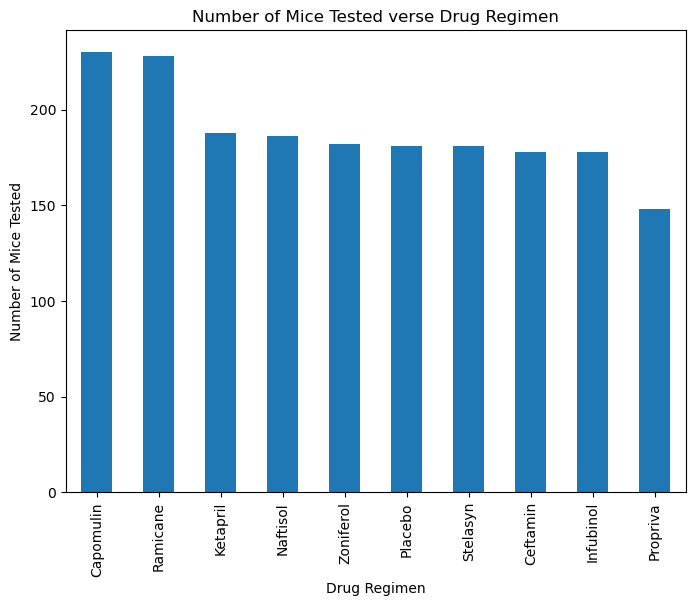

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_counts = mouse_counts2.plot(kind="bar", figsize=(8,6),
                                title="Number of Mice Tested verse Drug Regimen",
                                xlabel="Drug Regimen",
                                ylabel="Number of Mice Tested")
plt.show()


In [11]:
# Create Data for ploting by pyplot
cleaned_for_pyplot = cleaned_data.groupby(["Drug Regimen"]).count().sort_values(["Tumor Volume (mm3)"],ascending=False)
cleaned_for_pyplot = cleaned_for_pyplot.reset_index()
cleaned_for_pyplot.sample(10)

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ramicane,228,228,228,228,228,228,228
6,Stelasyn,181,181,181,181,181,181,181
2,Ketapril,188,188,188,188,188,188,188
8,Infubinol,178,178,178,178,178,178,178
3,Naftisol,186,186,186,186,186,186,186
9,Propriva,148,148,148,148,148,148,148
7,Ceftamin,178,178,178,178,178,178,178
4,Zoniferol,182,182,182,182,182,182,182
5,Placebo,181,181,181,181,181,181,181


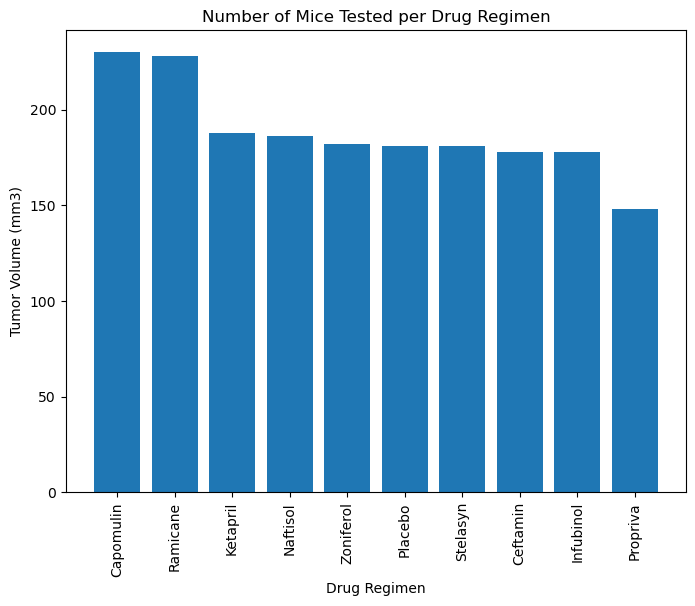

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(8, 6))
plt.bar(cleaned_for_pyplot["Drug Regimen"], cleaned_for_pyplot["Timepoint"])
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Number of Mice Tested per Drug Regimen")
plt.xticks(rotation=90)
plt.show()

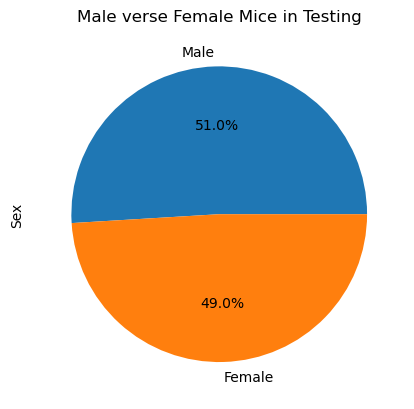

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# sex = cleaned_data["Sex"].value_counts()

mouse_distr = cleaned_data["Sex"].value_counts().plot(kind="pie", 
                                                      title ="Male verse Female Mice in Testing", label="Sex",
                                                     autopct="%1.1f%%")
plt.show()

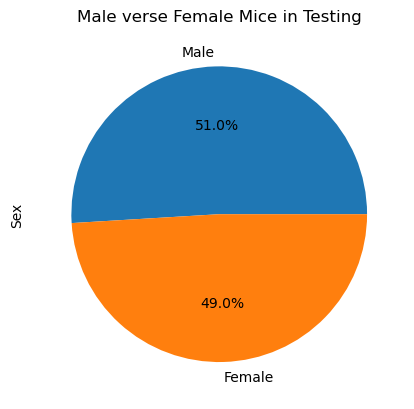

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(cleaned_data["Sex"].value_counts(), labels=('Male', 'Female'), startangle= 0, autopct="%1.1f%%")
plt.title("Male verse Female Mice in Testing")
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mvolume_df = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()
mvolume_df = mvolume_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(mvolume_df, cleaned_data,  how="left")
tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:


    # Locate the rows which contain mice on each drug and get the tumor volumes
    t_volume = tumor_df.loc[tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(t_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = t_volume.quantile([.25, .5, .75])
    lquart = quartiles[.25]
    uquart = quartiles[.75]
    iqr = uquart - lquart
    lowerbound = lquart - (1.5 * iqr)
    upperbound = uquart + (1.5 * iqr)
    outliers = t_volume.loc[(t_volume < lowerbound) | (t_volume > upperbound)]
    print(f"For {drug}, possible outliers are {outliers}")


For Capomulin, possible outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, possible outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, possible outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, possible outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


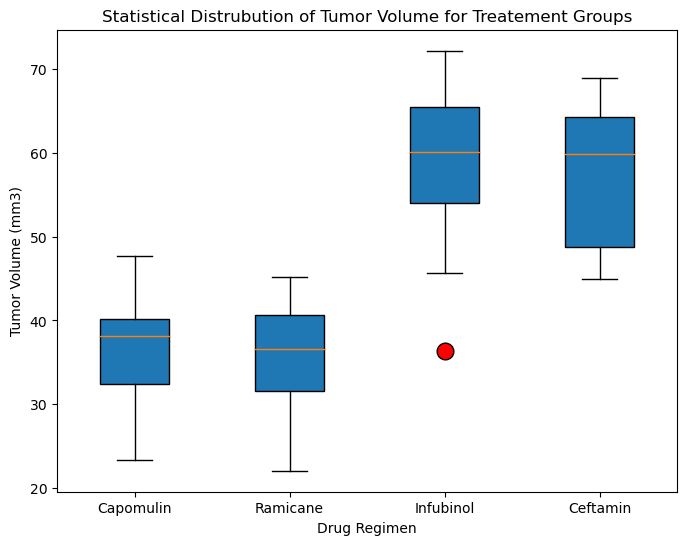

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize ="12")

figl, axl = plt.subplots(figsize=(8, 6))
axl.boxplot(tumor_vol, labels=treatments, patch_artist=True, flierprops=flierprops)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Statistical Distrubution of Tumor Volume for Treatement Groups")

plt.show()

## Line and Scatter Plots

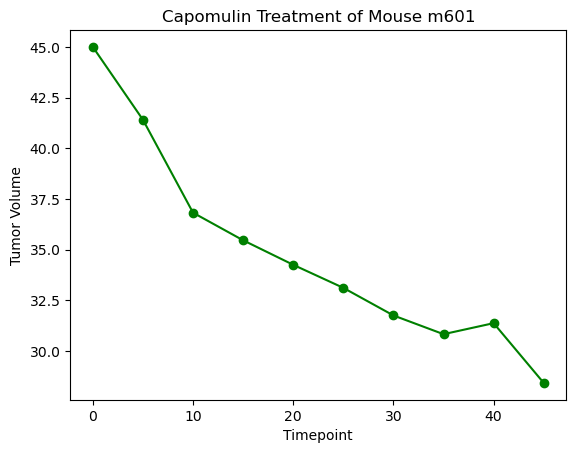

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin", :]

# get mouse data for tumor volume and timplots
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == 'm601', :]

#  Create line plot for identified mouse
x_axis = mouse_data["Timepoint"]
y_axis = mouse_data["Tumor Volume (mm3)"]


plt.title("Capomulin Treatment of Mouse m601")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.plot(x_axis, y_axis, marker="o", color="green")
plt.show()


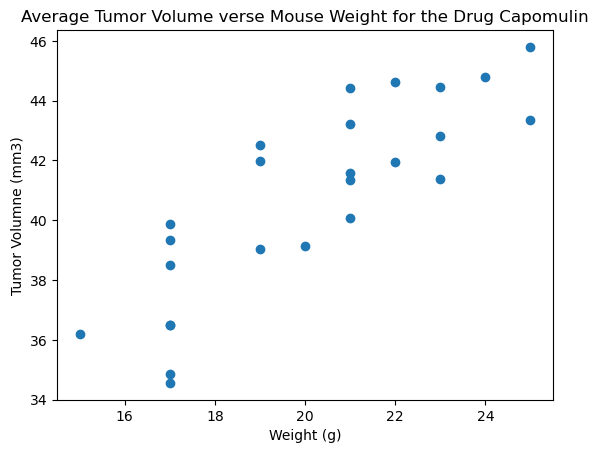

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_data = capomulin_data.groupby("Mouse ID").mean()


plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volumne (mm3)")
plt.title("Average Tumor Volume verse Mouse Weight for the Drug Capomulin")
plt.show()

## Correlation and Regression

The corralation between mouse weight and tumor volume is: 0.84


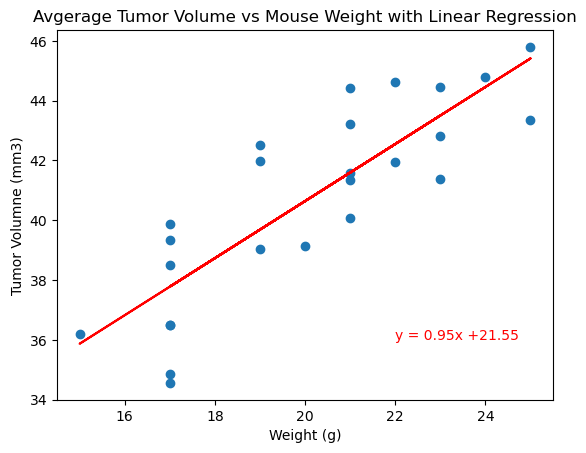

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])


line_eq = f"y = {round(slope ,2)}x +{round(intercept ,2)}"

print(f"The corralation between mouse weight and tumor volume is: {round(rvalue,2)}")

regress_values = (slope *avg_data["Weight (g)"]) + intercept
plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])
plt.plot(avg_data["Weight (g)"], regress_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volumne (mm3)")
plt.title("Avgerage Tumor Volume vs Mouse Weight with Linear Regression")
plt.annotate(line_eq, (22, 36), color="red")
plt.show()

